In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

import src
from src.reload import deep_reload

In [2]:
# Generating random graph
deep_reload(src)

seed = np.random.randint(0, sys.maxsize)
seed = 758712061200539789
print(seed)

n_nodes = 100
n_chargers = 10
charger_probability = .9
charger_fields = ['length']
charger_amounts = [40]
n_targets = 5
s = 10

scale = (100, 100)
link_bounds = (1e-6, np.inf)
link_speeds = [90]

minimum_path_probability = .9

graph = src.graph.random_graph(
    n_nodes,
    scale,
    s = s,
    link_bounds = link_bounds,
    link_speeds = link_speeds,
    seed = seed,
)

758712061200539789


In [3]:
deep_reload(src)

reset_range = 40
charge_rate = 40
delay = .1

rng = np.random.default_rng(seed)

# Adding cost functions to nodes
charger_nodes = list(rng.choice(list(range(n_nodes)), n_chargers, replace = False))
for source, node in graph._node.items():
    # print(rng.random() , n_chargers/n_nodes)
    if source in charger_nodes:

        node['cost'] = src.dijkstra_stochastic.Charger_Cost(
            reset_range, charge_rate, delay)

    else:

        node['cost'] = src.dijkstra_stochastic.Charger_Cost(
            reset_range, 6, 1)

for source, adj in graph._adj.items():
    for target in adj.keys():

        graph._adj[source][target]['cost'] = src.dijkstra_stochastic.Link_Cost(
            graph._adj[source][target])

In [4]:
deep_reload(src)

objective = {
    'range': {
        'initial': 40,
        'feasible': lambda x: x >= 0,
        'weight': 0,
    },
    'distance': {
        'initial': 0,
        'feasible': lambda x: True,
        'weight': 1,
    },
    'time': {
        'initial': 0,
        'feasible': lambda x: True,
        'weight': 1,
    },
} 

In [5]:
deep_reload(src)

destination_nodes = rng.choice(graph.nodes, n_targets, replace = False)
origin_nodes = rng.choice(graph.nodes, (1, ), replace = False)

In [6]:
deep_reload(src)

path_values, _ = src.dijkstra_stochastic.dijkstra(
    graph, 
    origin_nodes,
    objective,
    destination_nodes,
)

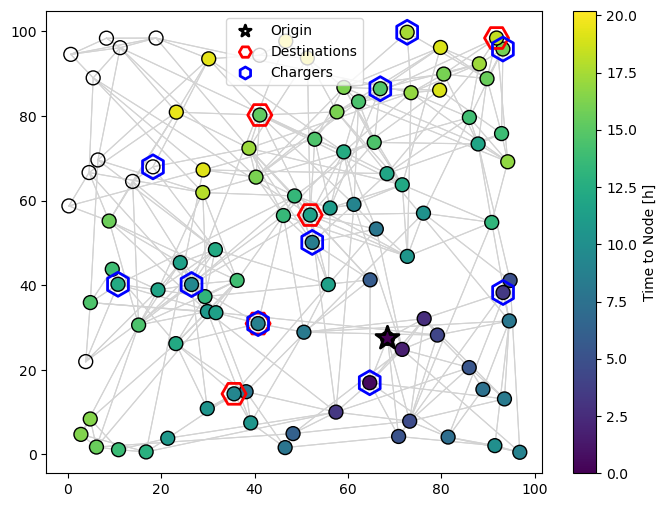

In [7]:
deep_reload(src)

fig = src.figures.dijkstra_output(
    graph, path_values, origin_nodes, destination_nodes, charger_nodes)

# fig.savefig('Document/figs/random_graph.png', bbox_inches = 'tight', dpi = 300)